In [1]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
import pickle

from IPython.display import display

In [2]:
def graph_show(result_dict):
    formatted_dict = deepcopy(result_dict)
    for attack_rate, result_ in formatted_dict.items():
        formatted_dict[attack_rate] = np.mean(result_)

    left = np.array(list(formatted_dict.keys()))
    height = np.array(list(formatted_dict.values()))

    plt.plot(left, height)
    plt.xlabel('Attacking ratio')
    plt.ylabel('Average of the concordance ratio')
    plt.grid(True)

In [3]:
def attack_show(attack_dict, attack):
    if attack == 'shuffle':
        result = attack_dict[attack]
        display('shuffle: ', np.mean(result))
        return

    if (attack == 'add'
        or attack == 'del'):
        result = attack_dict[attack]
        graph_show(result)
        return
    
    graph_show(attack_dict)

In [4]:
def attack_show_from_pickle(attack_dict_pickle, attack=None):
    with open(attack_dict_pickle, 'rb') as f:
        attack_dict = pickle.load(f)
    attack_show(attack_dict, attack)

In [5]:
attack_show_from_pickle('../result/attack_result.pkl', 'shuffle')

'shuffle: '

1.0

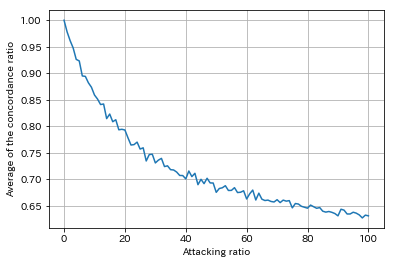

In [16]:
attack_show_from_pickle('../result/attack_result_existing.pkl', 'add')

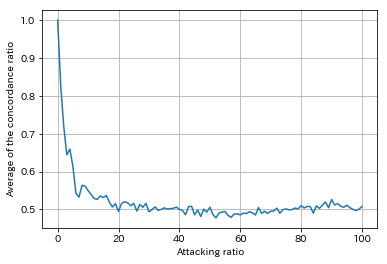

In [17]:
attack_show_from_pickle('../result/attack_result_existing.pkl', 'del')

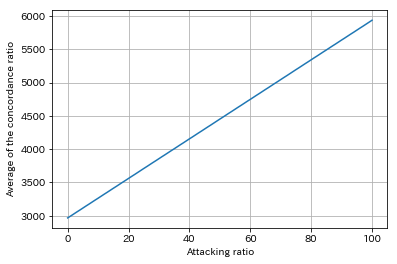

In [8]:
attack_show_from_pickle('../check.pkl')

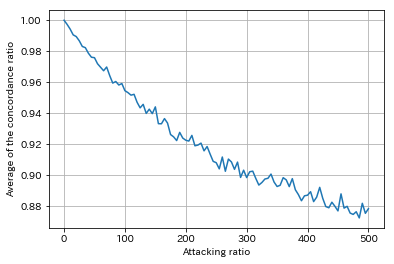

In [9]:
attack_show_from_pickle('../result/attack_result_add.pkl', 'add')

In [10]:
def per_mille2cent(n):
    return int(n / 10)

def graphs_show(result_dict_l, legend_l):
    # linestyles = ['solid', 'dashed', 'dashdot', 'dotted'] 
    linestyles = ['solid', 'solid', 'solid', 'solid']
    
    formatted_dict_l = deepcopy(result_dict_l)
    p_l = list()
    for i, formatted_dict in enumerate(formatted_dict_l):
        for attack_rate, result_ in formatted_dict.items():
            formatted_dict[attack_rate] = np.mean(result_)

        # left = np.array(list(map(per_mille2cent, formatted_dict.keys())))
        left = np.array(list(formatted_dict.keys()))
        height = np.array(list(formatted_dict.values()))

        p_l.append(plt.plot(left, height, linewidth=2, linestyle=linestyles[i]))
        
    plt.xlabel('Attacking ratio [%]')
    plt.ylabel('Average of the concordance ratio')
    plt.grid(True)
    plt.legend([x[0] for x in p_l], legend_l, loc='best')

In [11]:
def attacks_show(attack_dict_l, legend_l, attack):
    if attack == 'shuffle':
        for attack_dict in attack_dict_l:
            result = attack_dict[attack]
            display('shuffle: ', np.mean(result))
        return

    if (attack == 'add'
        or attack == 'del'):
        result_l = list()
        for attack_dict in attack_dict_l:
            result_l.append(attack_dict[attack])
        graphs_show(result_l, legend_l)
        return
    
    graph_show(attack_dict)

In [12]:
def load_pickle(pf):
    with open(pf, 'rb') as f:
        return pickle.load(f)

In [27]:
result_dict_list = list()
result_dict_list.append(load_pickle('../result/attack_result.pkl'))
result_dict_list.append(load_pickle('../result/attack_result_embedding.pkl'))
result_dict_list.append(load_pickle('../result/attack_result_existing.pkl'))
legend_l = ['proposed with location info.', 'proposed with embedding', 'existing method']

In [14]:
attacks_show(result_dict_list, legend_l, 'shuffle')

'shuffle: '

1.0

'shuffle: '

1.0

'shuffle: '

1.0

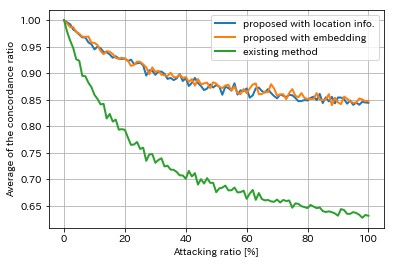

In [28]:
attacks_show(result_dict_list, legend_l, 'add')

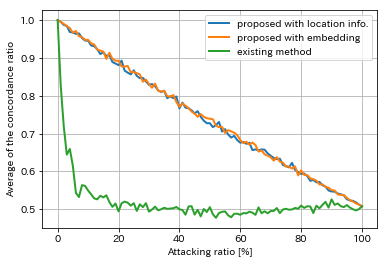

In [29]:
attacks_show(result_dict_list, legend_l, 'del')